# 124. Regras de associação

## Regras de Associação

> Aprendizagem não supervisionada.

> Objetiva encontrar relacionamentos e padrões entre elementos pertencentes ao conjunto de dados.

> Aplicações:

>> Campanhas de marketing;

>> Controlar estoque de lojas;

>> Descrever falhas em linhas de comunicação;

>> Ações na interface do usuário;

>> Ocorrência de doenças recorrentes;

> Exemplo:
    {leite, pão} → {manteiga}

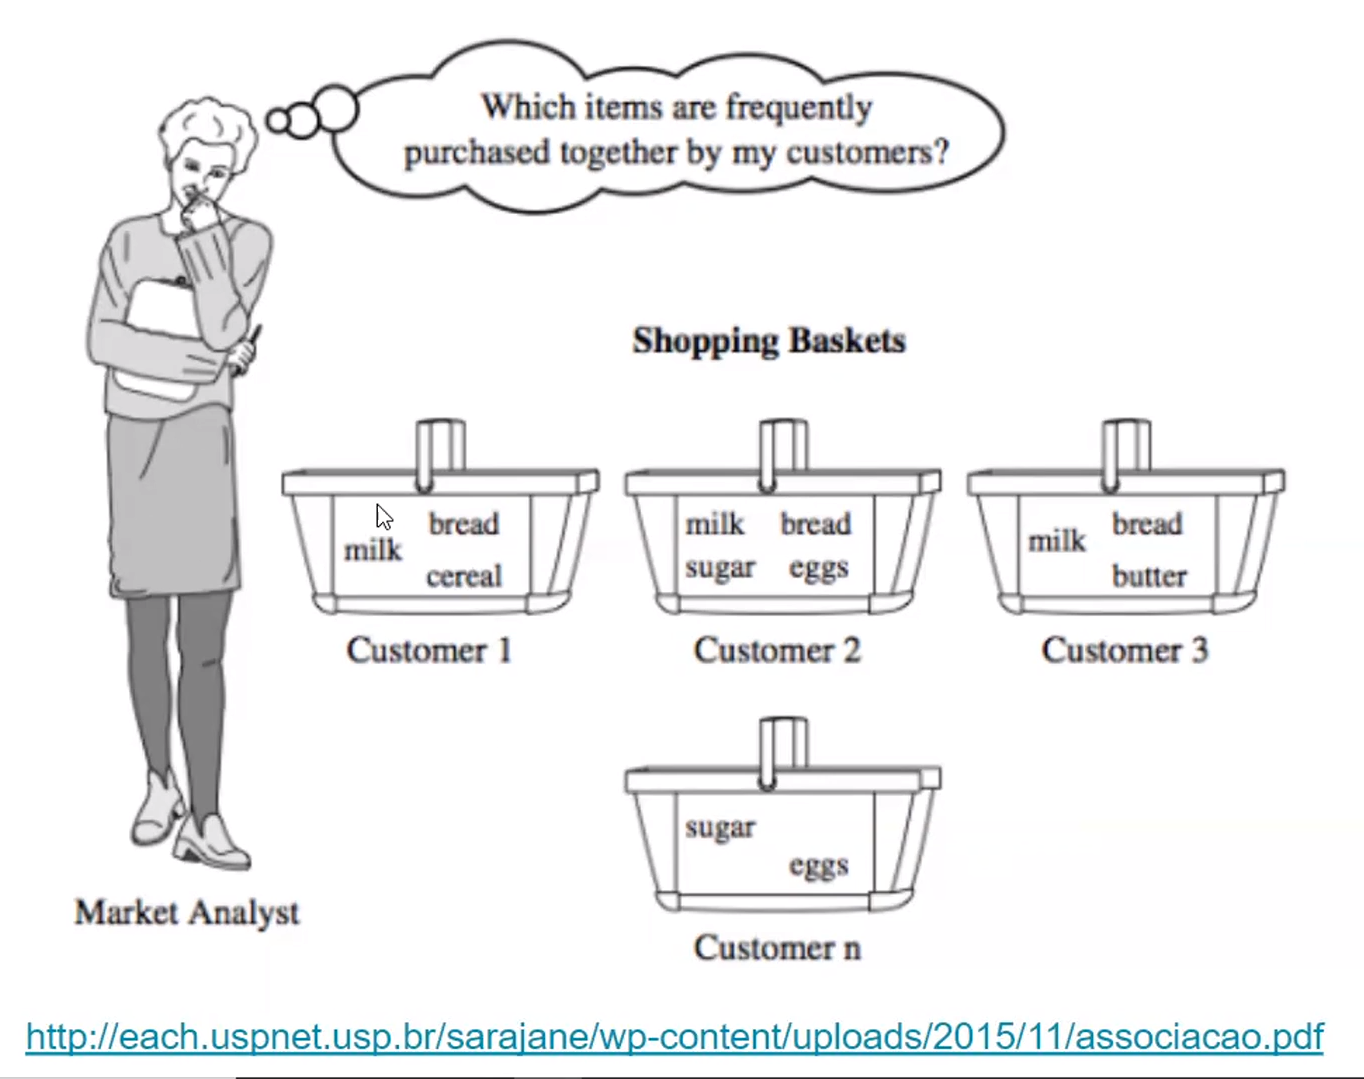

In [1]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Machine Learning com Python\ML_Jupyter_Anaconda\Secao_8_ANS_Associacao\Datasets\associacao.png')

# Exibir a imagem
imagem

## Regras de Associação

> Regra: X → Y

>> Suporte = Freq(X,Y)/N
>>> Frequência em que ocorrem juntos.    

>> Confiança = Freq(X,Y)/Freq(X)
>>> Probabilidade de ocorrerem juntos.

>> Lift = Suporte / Suporte(X)*Suporte(Y)
>>> Indica o grau da associação.

>> Alavancagem (Leverage): Mede a diferença de X e Y aparecendo juntos no conjunto e dados
>>> leverage(A → C) = support(A → C) - support(A) * support(C)

>> Convicção (Conviction): Indica o nível de dependência do consequente com relação ao antecedente.
>>> conviction(A → C) = 1 - support (C) / 1 - confidence(A → C)

## Algoritmos

> APRIORI: Utiliza conjunto de itens frequentes para gerar regras de associação.
>> Conjunto de itens frequentes é um conjunto de itens cujo valor de suporte é maior que um valor limite.

> ECLAT: É uma versão derivada do algoritmo Apriori, com abordagem de associação que o torna mais rápido.
>> Utiliza somente o suporte e não gera regras, utiliza somente os itens frequentes.

# 125. ECLAT

## **ECLAT**

In [2]:
!pip install pyECLAT

In [3]:
from pyECLAT import Example1

In [4]:
dados = Example1().get()

In [5]:
dados

,0,1,2,3
0,milk,beer,bread,butter
1,coffe,bread,butter,NaN
2,coffe,bread,butter,NaN
3,milk,coffe,bread,butter
4,beer,NaN,NaN,NaN
5,butter,NaN,NaN,NaN
6,bread,NaN,NaN,NaN
7,bean,NaN,NaN,NaN
8,rice,bean,NaN,NaN
9,rice,NaN,NaN,NaN


In [6]:
from pyECLAT import ECLAT
eclat = ECLAT(data=dados, verbose=True)

100%|██████████| 7/7 [00:00<00:00, 624.07it/s]


In [7]:
eclat.df_bin

,coffe,rice,bread,milk,butter,bean,beer
0,0,0,1,1,1,0,1
1,1,0,1,0,1,0,0
2,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0
8,0,1,0,0,0,1,0
9,0,1,0,0,0,0,0


In [8]:
eclat.uniq_

['coffe', 'rice', 'bread', 'milk', 'butter', nan, 'bean', 'beer']

In [9]:
indices, suporte = eclat.fit(min_support=0.2, min_combination=2, max_combination=4)

Combination 2 by 2


21it [00:00, 110.56it/s]


Combination 3 by 3


35it [00:00, 119.25it/s]


Combination 4 by 4


35it [00:00, 128.17it/s]


In [10]:
indices

{'coffe & bread': [1, 2, 3],
 'coffe & butter': [1, 2, 3],
 'bread & milk': [0, 3],
 'bread & butter': [0, 1, 2, 3],
 'milk & butter': [0, 3],
 'coffe & bread & butter': [1, 2, 3],
 'bread & milk & butter': [0, 3]}

In [11]:
suporte

{'coffe & bread': 0.3,
 'coffe & butter': 0.3,
 'bread & milk': 0.2,
 'bread & butter': 0.4,
 'milk & butter': 0.2,
 'coffe & bread & butter': 0.3,
 'bread & milk & butter': 0.2}

# 126. APRIORI

In [12]:
from pyECLAT import Example1
dados = Example1().get()
dados

,0,1,2,3
0,milk,beer,bread,butter
1,coffe,bread,butter,NaN
2,coffe,bread,butter,NaN
3,milk,coffe,bread,butter
4,beer,NaN,NaN,NaN
5,butter,NaN,NaN,NaN
6,bread,NaN,NaN,NaN
7,bean,NaN,NaN,NaN
8,rice,bean,NaN,NaN
9,rice,NaN,NaN,NaN


In [13]:
dados.shape

(10, 4)

In [14]:
from pyECLAT import ECLAT
eclat = ECLAT(data=dados)
dados2 = eclat.df_bin
dados2

,coffe,rice,bread,milk,butter,bean,beer
0,0,0,1,1,1,0,1
1,1,0,1,0,1,0,0
2,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0
8,0,1,0,0,0,1,0
9,0,1,0,0,0,0,0


In [15]:
from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
# Gerando a associação
associacao = apriori(dados2, min_support=0.05, use_colnames=True)

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
# Colocando em ordem dos mais frequentes
associacao.sort_values("support", ascending=False).head(15)

,support,itemsets
2,0.5,(bread)
4,0.5,(butter)
12,0.4,"(butter, bread)"
0,0.3,(coffe)
7,0.3,"(coffe, bread)"
9,0.3,"(butter, coffe)"
18,0.3,"(butter, coffe, bread)"
6,0.2,(beer)
5,0.2,(bean)
11,0.2,"(milk, bread)"


In [29]:
# Criando as regras de associação
regras = association_rules(associacao, metric="confidence")

In [32]:
# Colocando em ordem de suporte, confiança ou grau de associação (Lift)
resultado = regras.sort_values("support", ascending=False)

In [33]:
resultado.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(butter),(bread),0.5,0.5,0.4,0.8,1.6,0.15,2.5,0.750000
4,(bread),(butter),0.5,0.5,0.4,0.8,1.6,0.15,2.5,0.750000
0,(coffe),(bread),0.3,0.5,0.3,1.0,2.0,0.15,inf,0.714286
7,"(butter, coffe)",(bread),0.3,0.5,0.3,1.0,2.0,0.15,inf,0.714286
8,"(coffe, bread)",(butter),0.3,0.5,0.3,1.0,2.0,0.15,inf,0.714286
9,(coffe),"(butter, bread)",0.3,0.4,0.3,1.0,2.5,0.18,inf,0.857143
1,(coffe),(butter),0.3,0.5,0.3,1.0,2.0,0.15,inf,0.714286
2,(milk),(bread),0.2,0.5,0.2,1.0,2.0,0.10,inf,0.625000
5,(milk),(butter),0.2,0.5,0.2,1.0,2.0,0.10,inf,0.625000
11,"(butter, milk)",(bread),0.2,0.5,0.2,1.0,2.0,0.10,inf,0.625000
